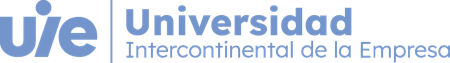

**G25GXX3.10X. Aprendizaje Automático**

**Profesor: Borja González Seoane**

Curso 2025-26

# PLD2. Normalización y Estandarización del Conjunto de Datos _Pingüinos de Palmer_

Para este ejercicio se volverá a emplear, al igual que en la PLD1, el conjunto de datos _Pingüinos de Palmer_. Encontrará el CSV `palmer_penguins.csv` en el Campus Virtual. Este conjunto de datos contiene información sobre pingüinos de varias especies diferentes. 

En este ejercicio, teniendo en consideración los análisis del EDA de la PLD1, se deberá trabajar con Scikit-Learn para normalizar y estandarizar las columnas numéricas del conjunto de datos. Probablemente sea de utilidad emplear visualizaciones de datos para observar los cambios de las transformaciones aplicadas.

Sugerencias:

1. Analice la correlación entre las variables numéricas del conjunto de datos. Utilice una matriz de correlación como visualización.
2. Considere la posibilidad de combinar varias variables numéricas en una sola variable compuesta.
3. Implemente a mano las funciones de normalización y estandarización para entender mejor los conceptos.
4. Seleccione las columnas numéricas que desea normalizar y estandarizar del conjunto de datos de pingüinos.
5. Compare los resultados de la normalización y la estandarización mediante visualizaciones (por ejemplo, histogramas, diagramas de caja).
6. Utilice `MinMaxScaler` de Scikit-Learn para normalizar las columnas seleccionadas.
7. Utilice `StandardScaler` de Scikit-Learn para estandarizar las columnas seleccionadas.
8. Compare los resultados obtenidos con las implementaciones manuales y las de Scikit-Learn.
9. Documente sus hallazgos y conclusiones sobre cómo la normalización y la estandarización afectan a los datos.


In [14]:
import pandas as pd
import matplotlib.pyplot as plt  # autoflake: skip
import plotly.express as px  # autoflake: skip
import seaborn as sns  # autoflake: skip
import sklearn as sk  


## Carga del conjunto de datos

In [15]:
CSV_FILE = "palmer_penguins.csv"

df = pd.read_csv(CSV_FILE)
print(df.head())

   id species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0   0  Adelie  Torgersen            39.1           18.7              181.0   
1   1  Adelie  Torgersen            39.5           17.4              186.0   
2   2  Adelie  Torgersen            40.3           18.0              195.0   
3   3  Adelie  Torgersen             NaN            NaN                NaN   
4   4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  


## Análisis de correlación entre variables

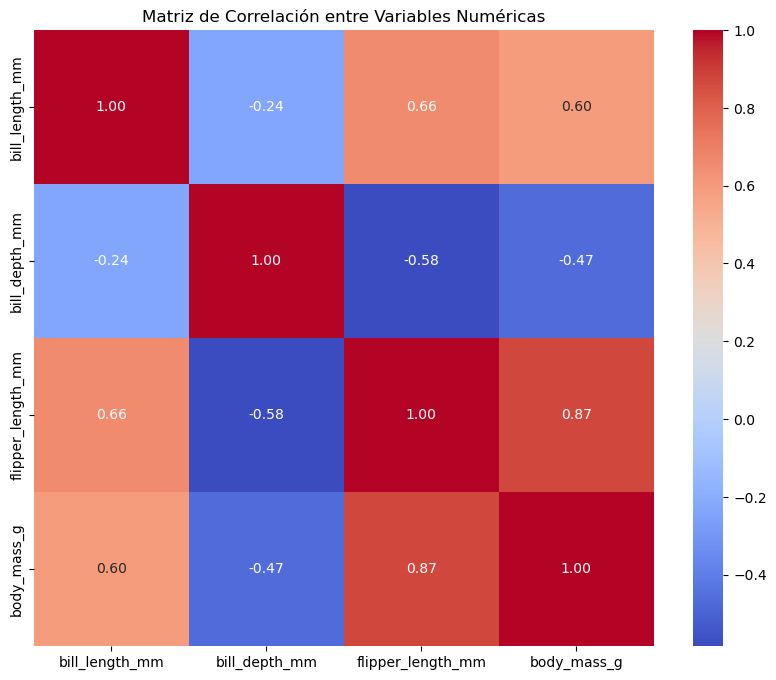

In [16]:

# Seleccionamos solo las columnas numéricas(omitimos id y year)
columnas_numericas = df.select_dtypes(include=['float64', 'int64']).drop(columns=['id', 'year'])

# Calculamos la matriz de correlación
matriz_correlacion = columnas_numericas.corr()

# Mostramos la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()


### 2. Considere la posibilidad de combinar varias variables numéricas en una sola variable compuesta.

In [17]:
# 2. Creamos variables compuestas basadas en la correlación
# Promedio simple: tamaño general (longitud de aleta + masa corporal) / 2
df["tamano_promedio"] = (df["flipper_length_mm"] + df["body_mass_g"]) / 2

# Mostramos las primeras filas del DataFrame con la nueva variable compuesta
# 3. Mostramos algunas filas para comprobar
print(df[["flipper_length_mm", "body_mass_g", "tamano_promedio"]].head())

   flipper_length_mm  body_mass_g  tamano_promedio
0              181.0       3750.0           1965.5
1              186.0       3800.0           1993.0
2              195.0       3250.0           1722.5
3                NaN          NaN              NaN
4              193.0       3450.0           1821.5


## Normalización

In [18]:
# Creamos la función de normalización
def normalizar(columna):
    return (columna - columna.min()) / (columna.max() - columna.min())
# Aplicamos la normalización a las columnas numéricas
columnas_numericas_normalizadas = columnas_numericas.apply(normalizar)
# Mostramos las primeras filas del DataFrame normalizado
print(columnas_numericas_normalizadas.head())

   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0        0.254545       0.666667           0.152542     0.291667
1        0.269091       0.511905           0.237288     0.305556
2        0.298182       0.583333           0.389831     0.152778
3             NaN            NaN                NaN          NaN
4        0.167273       0.738095           0.355932     0.208333


## Estandarización

In [19]:
# Creamos la función de estandarización
def estandarizar(columna):
    return (columna - columna.mean()) / columna.std()   
# Aplicamos la estandarización a las columnas numéricas
columnas_numericas_estandarizadas = columnas_numericas.apply(estandarizar)
# Mostramos las primeras filas del DataFrame estandarizado
print(columnas_numericas_estandarizadas.head())

   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0       -0.883205       0.784300          -1.416272    -0.563317
1       -0.809939       0.126003          -1.060696    -0.500969
2       -0.663408       0.429833          -0.420660    -1.186793
3             NaN            NaN                NaN          NaN
4       -1.322799       1.088129          -0.562890    -0.937403


### 5. Compare los resultados de la normalización y la estandarización mediante visualizaciones (por ejemplo, histogramas, diagramas de caja).

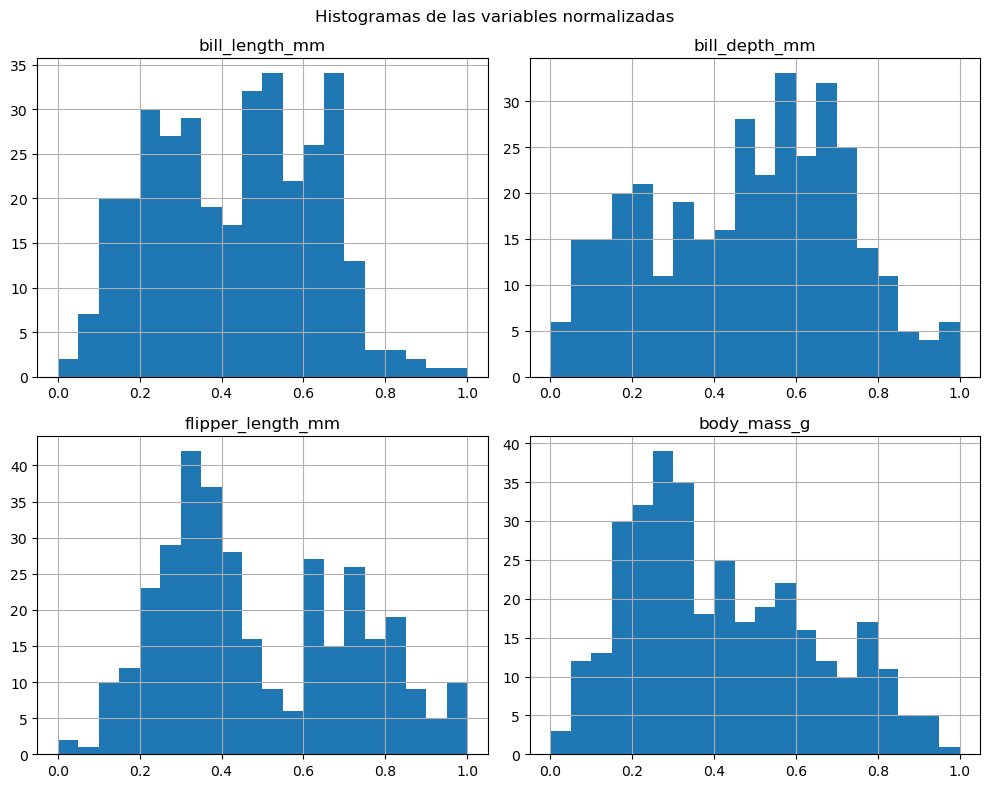

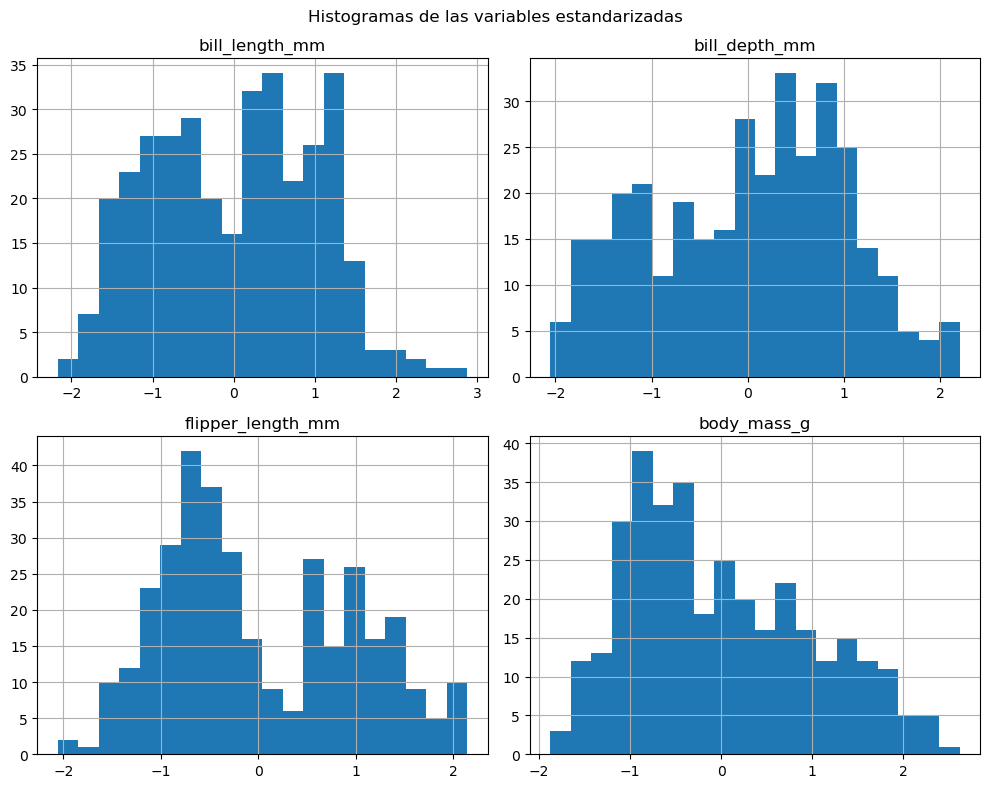

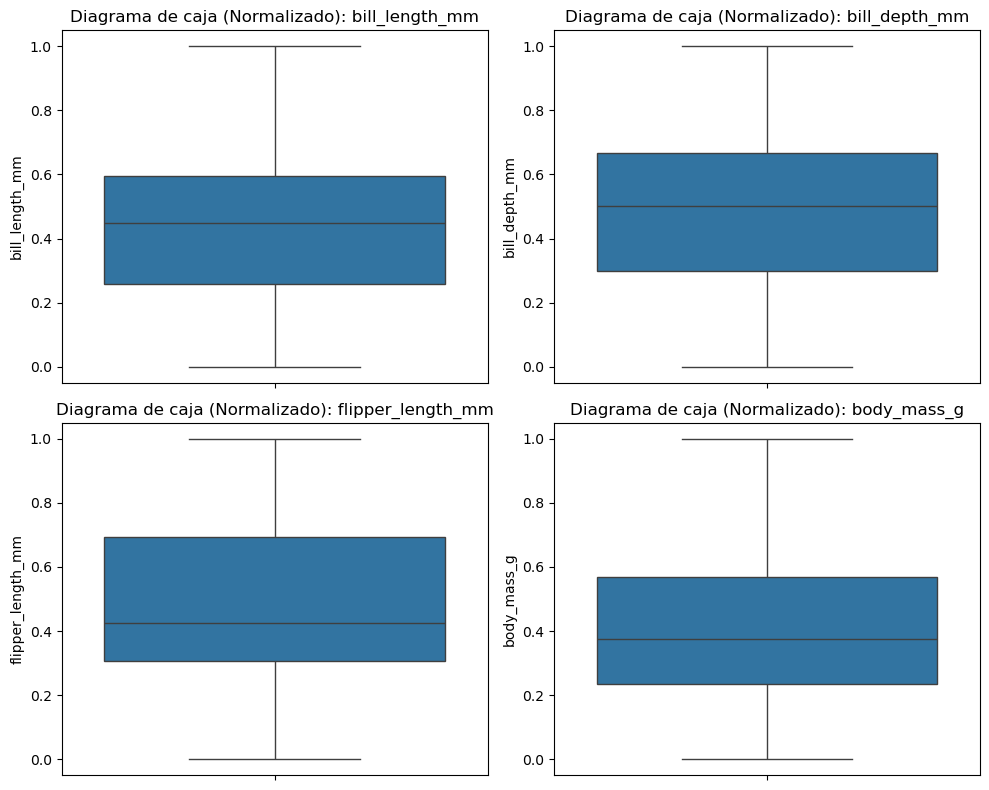

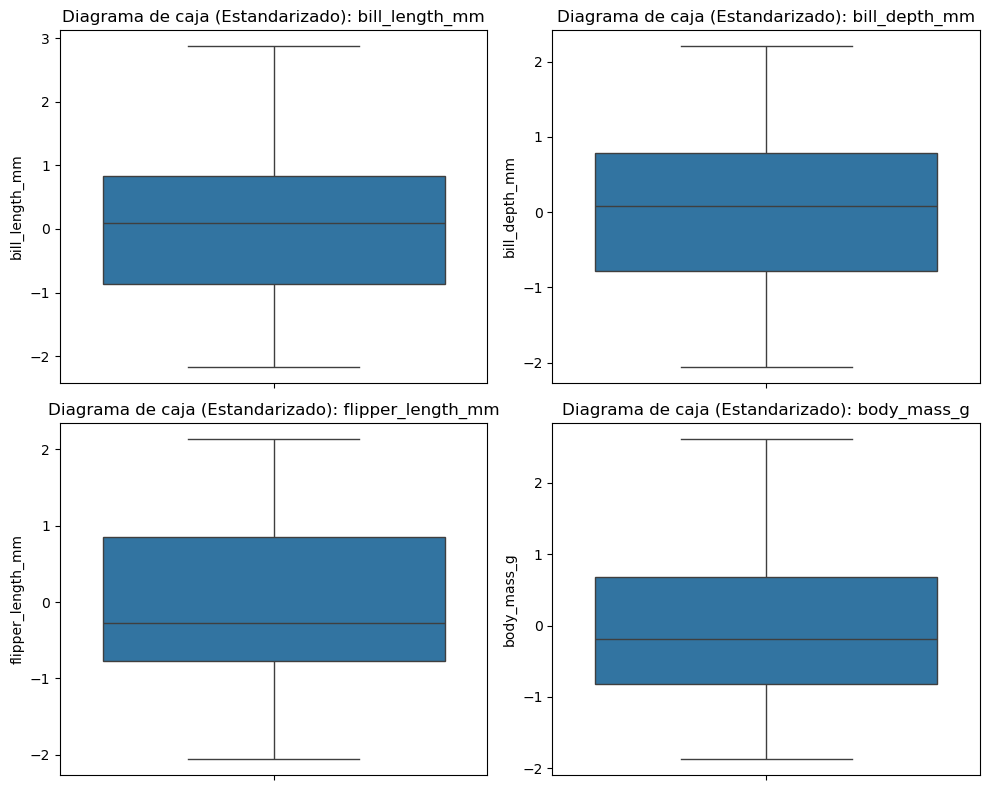

In [20]:
num_columnas = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]


# Histograma normalización
columnas_numericas_normalizadas[num_columnas].hist(bins=20, figsize=(10, 8), layout=(2, 2))
plt.suptitle("Histogramas de las variables normalizadas")
plt.tight_layout()
plt.show()

# Histograma estandarización
columnas_numericas_estandarizadas[num_columnas].hist(bins=20, figsize=(10, 8), layout=(2, 2))
plt.suptitle("Histogramas de las variables estandarizadas")
plt.tight_layout()
plt.show()

# Diagramas de caja  para las variables normalizadas
plt.figure(figsize=(10, 8))
for i, col in enumerate(num_columnas, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=columnas_numericas_normalizadas[col])
    plt.title(f'Diagrama de caja (Normalizado): {col}')
plt.tight_layout()
plt.show()

# Diagramas de caja  para las variables estandarizadas
plt.figure(figsize=(10, 8))
for i, col in enumerate(num_columnas, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=columnas_numericas_estandarizadas[col])
    plt.title(f'Diagrama de caja (Estandarizado): {col}')
plt.tight_layout()
plt.show()

### 6. Utilice `MinMaxScaler` de Scikit-Learn para normalizar las columnas seleccionadas.

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Creamos una instancia de MinMaxScaler
escalador = MinMaxScaler()

# Aplicamos el escalador a las columnas numéricas seleccionadas
columnas_normalizadas_sklearn = pd.DataFrame(
    escalador.fit_transform(columnas_numericas),
    columns=columnas_numericas.columns
)

# Mostramos las primeras filas del DataFrame normalizado
print(columnas_normalizadas_sklearn.head())

   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0        0.254545       0.666667           0.152542     0.291667
1        0.269091       0.511905           0.237288     0.305556
2        0.298182       0.583333           0.389831     0.152778
3             NaN            NaN                NaN          NaN
4        0.167273       0.738095           0.355932     0.208333


### 7. Utilice `StandardScaler` de Scikit-Learn para estandarizar las columnas seleccionadas.


In [22]:
from sklearn.preprocessing import StandardScaler

# Creamos una instancia de StandardScaler
scaler_standard = StandardScaler()

# Aplicamos el escalador a las columnas numéricas seleccionadas
columnas_estandarizadas_sklearn = pd.DataFrame(
    scaler_standard.fit_transform(columnas_numericas),
    columns=columnas_numericas.columns
)

# Mostramos las primeras filas del DataFrame estandarizado
print(columnas_estandarizadas_sklearn.head())

   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0       -0.884499       0.785449          -1.418347    -0.564142
1       -0.811126       0.126188          -1.062250    -0.501703
2       -0.664380       0.430462          -0.421277    -1.188532
3             NaN            NaN                NaN          NaN
4       -1.324737       1.089724          -0.563715    -0.938776


### 8. Compare los resultados obtenidos con las implementaciones manuales y las de Scikit-Learn.

In [23]:
# Comparación de normalización
diferencia_normalizacion = columnas_numericas_normalizadas - columnas_normalizadas_sklearn
print("Diferencia en normalización (manual vs Scikit-Learn):")
print(diferencia_normalizacion.describe())

# Comparación de estandarización
diferencia_estandarizacion = columnas_numericas_estandarizadas - columnas_estandarizadas_sklearn
print("\nDiferencia en estandarización (manual vs Scikit-Learn):")
print(diferencia_estandarizacion.describe())


Diferencia en normalización (manual vs Scikit-Learn):
       bill_length_mm  bill_depth_mm  flipper_length_mm   body_mass_g
count    3.420000e+02   3.420000e+02       3.420000e+02  3.420000e+02
mean    -5.660677e-18  -3.476548e-17      -2.000309e-16 -2.678170e-18
std      7.637258e-17   9.203122e-17       1.332716e-16  6.509591e-17
min     -1.387779e-16  -2.220446e-16      -4.440892e-16 -1.110223e-16
25%     -5.551115e-17  -1.110223e-16      -3.330669e-16 -5.551115e-17
50%      0.000000e+00  -5.551115e-17      -2.220446e-16  0.000000e+00
75%      5.551115e-17   0.000000e+00      -1.110223e-16  2.775558e-17
max      2.220446e-16   1.110223e-16       0.000000e+00  1.110223e-16

Diferencia en estandarización (manual vs Scikit-Learn):
       bill_length_mm  bill_depth_mm  flipper_length_mm   body_mass_g
count    3.420000e+02   3.420000e+02       3.420000e+02  3.420000e+02
mean    -3.733206e-18   6.046171e-18       1.688058e-17 -6.857737e-18
std      1.465202e-03   1.465202e-03       1.4652

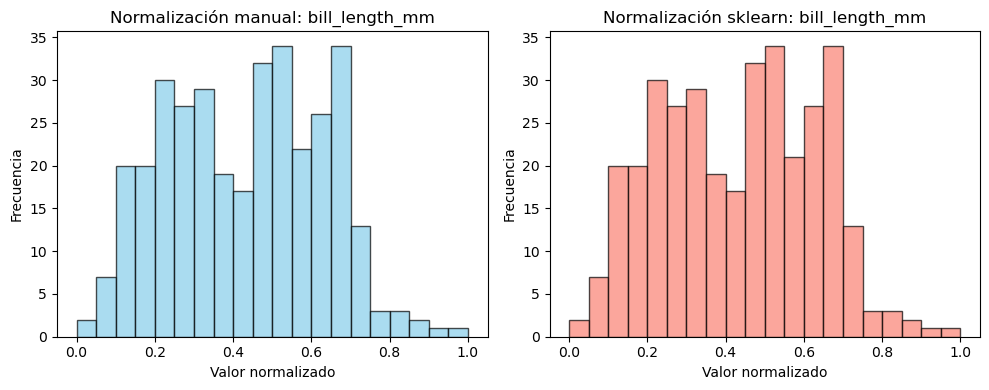

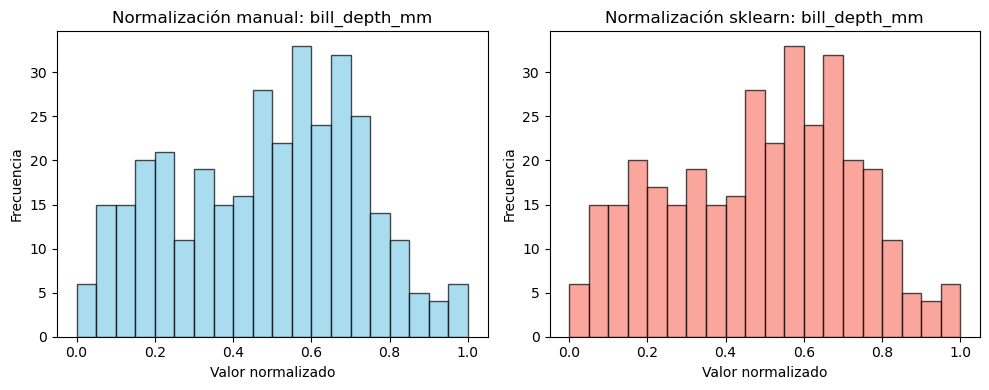

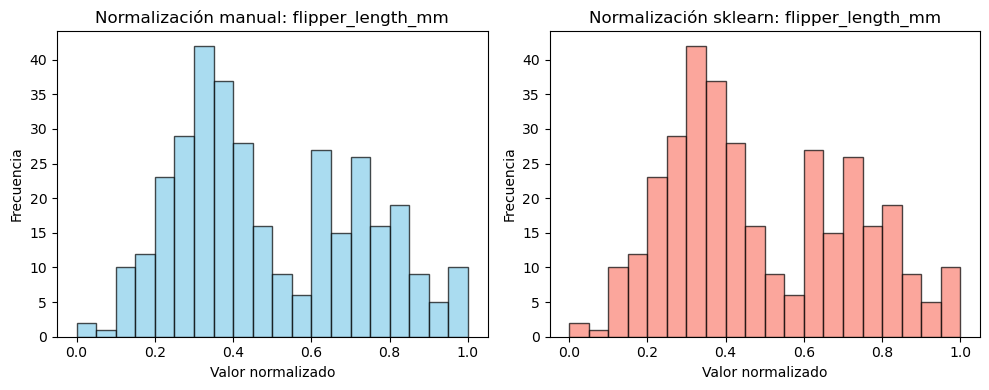

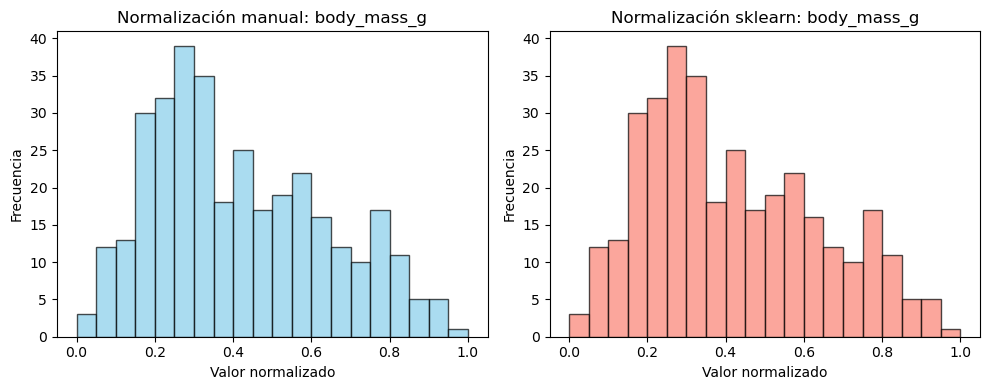

In [24]:
# Comparación gráfica de normalización
# Creamos histogramas comparativos
for col in num_columnas:
    plt.figure(figsize=(10,4))

    # Histograma normalización manual
    plt.subplot(1,2,1)
    plt.hist(columnas_numericas_normalizadas[col], bins=20, alpha=0.7, color="skyblue", edgecolor="black")
    plt.title(f"Normalización manual: {col}")
    plt.xlabel("Valor normalizado")
    plt.ylabel("Frecuencia")

    # Histograma normalización sklearn
    plt.subplot(1,2,2)
    plt.hist(columnas_normalizadas_sklearn[col], bins=20, alpha=0.7, color="salmon", edgecolor="black")
    plt.title(f"Normalización sklearn: {col}")
    plt.xlabel("Valor normalizado")
    plt.ylabel("Frecuencia")

    plt.tight_layout()
    plt.show()

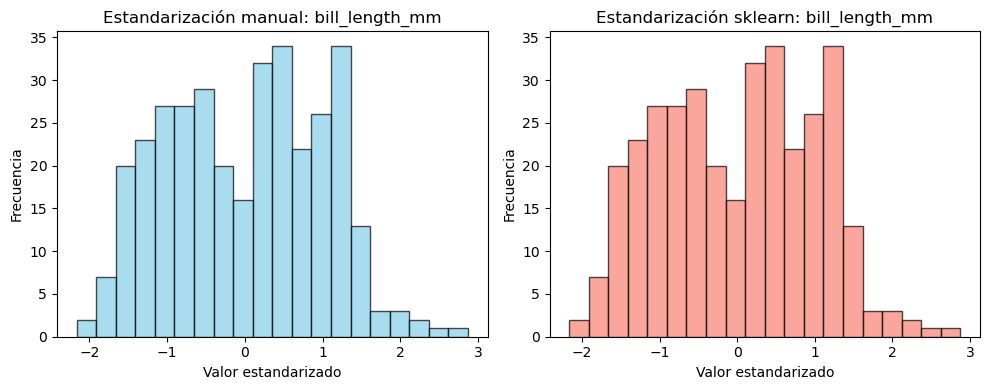

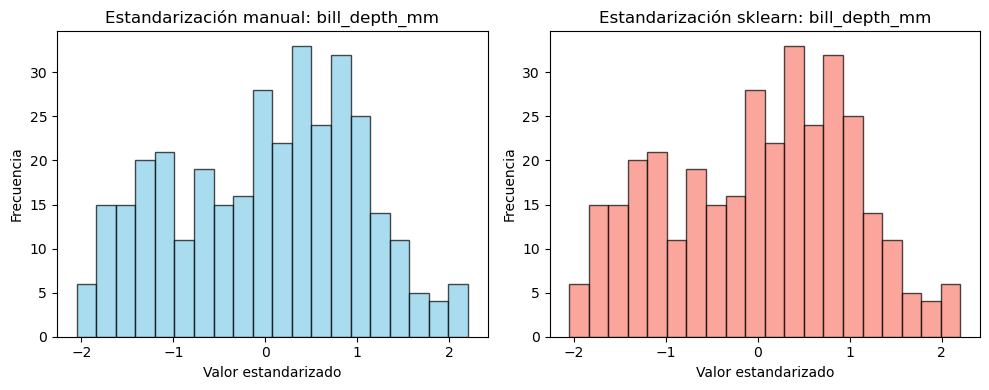

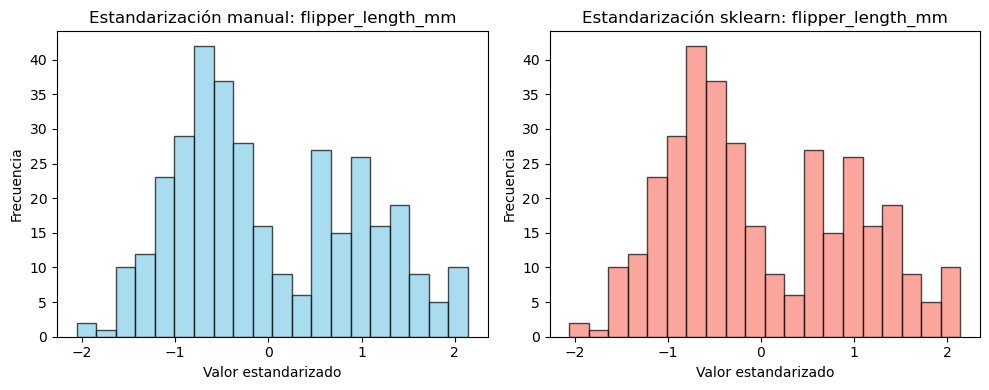

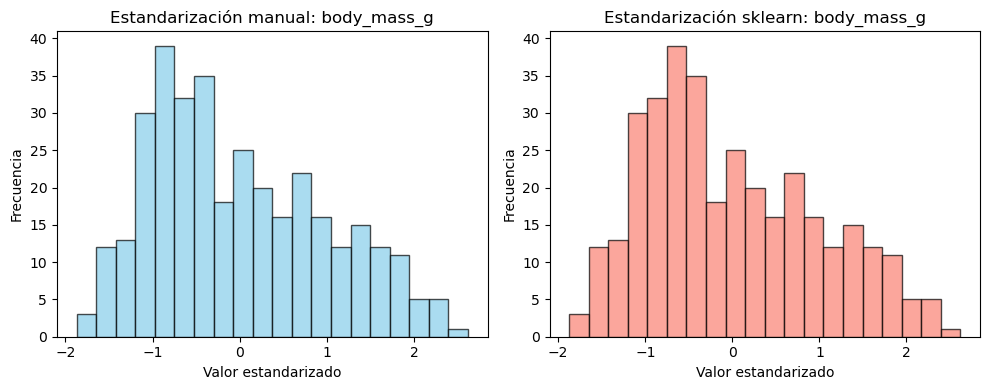

In [25]:
# Comparación gráfica de estandarización
# Creamos histogramas comparativos
for col in num_columnas:
    plt.figure(figsize=(10,4))

    # Histograma estandarización manual
    plt.subplot(1,2,1)
    plt.hist(columnas_numericas_estandarizadas[col], bins=20, alpha=0.7, color="skyblue", edgecolor="black")
    plt.title(f"Estandarización manual: {col}")
    plt.xlabel("Valor estandarizado")
    plt.ylabel("Frecuencia")

    # Histograma estandarización sklearn
    plt.subplot(1,2,2)
    plt.hist(columnas_estandarizadas_sklearn[col], bins=20, alpha=0.7, color="salmon", edgecolor="black")
    plt.title(f"Estandarización sklearn: {col}")
    plt.xlabel("Valor estandarizado")
    plt.ylabel("Frecuencia")

    plt.tight_layout()
    plt.show()

## Conclusiones


...

In [26]:
#Analizamos las variables numéricas, generamos nuevas variables compuestas y aplicamos técnicas de normalización y estandarización de forma manual 
# y con scikit-learn. Al comparar los resultados comprobamos que ambas aproximaciones son equivalentes, con diferencias mínimas que tienen que ver con la
# precisión numérica. Esto nos permitió confirmar las implementaciones que hemos hecho son correctas y resaltar la utilidad de las librerías especializadas
#  por su eficiencia y precisión en el preprocesamiento de datos.